In [1]:
import keras as k
from keras.models import Sequential,load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
#loading data

data = pd.read_csv('kidney_disease.csv')
data.columns


Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

We use the following representation to collect the dataset
age - age
bp - blood pressure
sg - specific gravity
al - albumin
su - sugar
rbc - red blood cells
pc - pus cell
pcc - pus cell clumps
ba - bacteria
bgr - blood glucose random
bu - blood urea
sc - serum creatinine
sod - sodium
pot - potassium
hemo - hemoglobin
pcv - packed cell volume
wc - white blood cell count
rc - red blood cell count
htn - hypertension
dm - diabetes mellitus
cad - coronary artery disease
appet - appetite
pe - pedal edema
ane - anemia
class - class

In [3]:
#shape of data
data.shape

(400, 26)

In [4]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
#list of column name
data_column = ['sg', 'al' , 'sc' , 'hemo' , 'pcv' , 'wc' , 'rc' , 'htn' , 'classification']

#taking only features present in data_colimn
df = data.drop([column for column in data.columns if not column in data_column] , axis=1)
    
df.head()

,sg,al,sc,hemo,pcv,wc,rc,htn,classification
0,1.020,1.0,1.2,15.4,44,7800,5.2,yes,ckd
1,1.020,4.0,0.8,11.3,38,6000,NaN,no,ckd
2,1.010,2.0,1.8,9.6,31,7500,NaN,no,ckd
3,1.005,4.0,3.8,11.2,32,6700,3.9,yes,ckd
4,1.010,2.0,1.4,11.6,35,7300,4.6,no,ckd


In [6]:
#calculating nan values
df.isna().sum()

#removing nan values
df = df.dropna(axis=0)
#df.isna().sum()

In [7]:
#trsnform non numeric data
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

<ipython-input-7-9a93ba53df45>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


In [8]:
df.head()

,sg,al,sc,hemo,pcv,wc,rc,htn,classification
0,1.020,1.0,1.2,15.4,26,65,30,1,0
3,1.005,4.0,3.8,11.2,14,55,15,1,0
4,1.010,2.0,1.4,11.6,17,61,23,0,0
5,1.015,3.0,1.1,12.2,21,65,21,1,0
7,1.015,2.0,1.1,12.4,26,57,27,0,0


In [9]:
#splitting the data foe testing and training
x = df.drop(['classification'] ,axis= 1)
y = df['classification']

In [10]:
#scaling
#using min-max-scaler this converts the data in to 0 to 1
x_scaler = MinMaxScaler()
x_scaler.fit(x)   #fit the data for the x dataframe
column_name = x.columns #stores the columns name
x[column_name] = x_scaler.transform(x) #will transform the x dataform across the columns

In [11]:
#splitting the data in train and test set
x_train  ,x_test,y_train ,y_test = train_test_split(x , y ,test_size=0.2 ,shuffle=True )

In [12]:
#building the model
#Sequential groups a linear stack of layers into a tf.keras.Model.
#Sequential provides training and inference features on this model.
#Dense layer is the regular deeply connected neural network layer. It is most common and frequently used layer
#Initializers define the way to set the initial random weights of Keras layers.

model = Sequential()
model.add(Dense(256 ,input_dim=len(x.columns), kernel_initializer = k.initializers.random_normal(seed =13), activation = 'relu'))
model.add(Dense(1,activation= 'hard_sigmoid'))

In [13]:
#comppile the model
#loss function are of mant types
#for more info :- https://data-flair.training/blogs/compile-evaluate-predict-model-in-keras/

model.compile(loss= 'binary_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])

In [14]:
#train the model
training = model.fit(x_train,y_train , epochs=2000 ,batch_size = x_train.shape[0])

Epoch 1/2000
1/1 [==============================] - 21s 21s/step - loss: 0.6862 - accuracy: 0.5421
Epoch 2/2000
1/1 [==============================] - 0s 30ms/step - loss: 0.6763 - accuracy: 0.5421
Epoch 3/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.6666 - accuracy: 0.5421
Epoch 4/2000
1/1 [==============================] - 0s 0s/step - loss: 0.6573 - accuracy: 0.5421
Epoch 5/2000
1/1 [==============================] - 0s 0s/step - loss: 0.6482 - accuracy: 0.5421
Epoch 6/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6395 - accuracy: 0.5526
Epoch 7/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6309 - accuracy: 0.5737
Epoch 8/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6226 - accuracy: 0.5842
Epoch 9/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6145 - accuracy: 0.5947
Epoch 10/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6065 - accuracy: 0.6105
Epoch 11/2000
1/1

1/1 [==============================] - 0s 9ms/step - loss: 0.1266 - accuracy: 0.9421
Epoch 84/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1245 - accuracy: 0.9421
Epoch 85/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1225 - accuracy: 0.9474
Epoch 86/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.1205 - accuracy: 0.9474
Epoch 87/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.1186 - accuracy: 0.9474
Epoch 88/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.1169 - accuracy: 0.9474
Epoch 89/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1152 - accuracy: 0.9474
Epoch 90/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.1136 - accuracy: 0.9474
Epoch 91/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1120 - accuracy: 0.9474
Epoch 92/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.1105 - accuracy: 0.9474
Epoch 93/2000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 0.0633 - accuracy: 0.9737
Epoch 165/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0630 - accuracy: 0.9737
Epoch 166/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0626 - accuracy: 0.9789
Epoch 167/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0622 - accuracy: 0.9789
Epoch 168/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0618 - accuracy: 0.9789
Epoch 169/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0614 - accuracy: 0.9789
Epoch 170/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0610 - accuracy: 0.9789
Epoch 171/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0607 - accuracy: 0.9789
Epoch 172/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0603 - accuracy: 0.9789
Epoch 173/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0600 - accuracy: 0.9789
Epoch 174/2000


1/1 [==============================] - 0s 6ms/step - loss: 0.0436 - accuracy: 0.9842
Epoch 247/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0434 - accuracy: 0.9842
Epoch 248/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0433 - accuracy: 0.9842
Epoch 249/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0431 - accuracy: 0.9842
Epoch 250/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0430 - accuracy: 0.9842
Epoch 251/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0428 - accuracy: 0.9842
Epoch 252/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0427 - accuracy: 0.9842
Epoch 253/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0425 - accuracy: 0.9842
Epoch 254/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0424 - accuracy: 0.9842
Epoch 255/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0422 - accuracy: 0.9842
Epoch 256/2000


1/1 [==============================] - 0s 7ms/step - loss: 0.0326 - accuracy: 0.9842
Epoch 329/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0325 - accuracy: 0.9842
Epoch 330/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0324 - accuracy: 0.9842
Epoch 331/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0323 - accuracy: 0.9842
Epoch 332/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.9842
Epoch 333/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0321 - accuracy: 0.9842
Epoch 334/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0320 - accuracy: 0.9842
Epoch 335/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0319 - accuracy: 0.9842
Epoch 336/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0318 - accuracy: 0.9842
Epoch 337/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0317 - accuracy: 0.9842
Epoch 338/2000


1/1 [==============================] - 0s 5ms/step - loss: 0.0256 - accuracy: 0.9842
Epoch 411/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0255 - accuracy: 0.9842
Epoch 412/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0255 - accuracy: 0.9842
Epoch 413/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0254 - accuracy: 0.9842
Epoch 414/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0253 - accuracy: 0.9842
Epoch 415/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0253 - accuracy: 0.9842
Epoch 416/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0252 - accuracy: 0.9842
Epoch 417/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0252 - accuracy: 0.9842
Epoch 418/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0251 - accuracy: 0.9895
Epoch 419/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0250 - accuracy: 0.9895
Epoch 420/2000


1/1 [==============================] - 0s 5ms/step - loss: 0.0210 - accuracy: 0.9895
Epoch 493/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0210 - accuracy: 0.9895
Epoch 494/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0210 - accuracy: 0.9895
Epoch 495/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0209 - accuracy: 0.9895
Epoch 496/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0209 - accuracy: 0.9895
Epoch 497/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0208 - accuracy: 0.9895
Epoch 498/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0208 - accuracy: 0.9895
Epoch 499/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0207 - accuracy: 0.9895
Epoch 500/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0207 - accuracy: 0.9895
Epoch 501/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0207 - accuracy: 0.9895
Epoch 502/2000


1/1 [==============================] - 0s 4ms/step - loss: 0.0178 - accuracy: 0.9895
Epoch 575/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0178 - accuracy: 0.9895
Epoch 576/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0177 - accuracy: 0.9895
Epoch 577/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.0177 - accuracy: 0.9895
Epoch 578/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0177 - accuracy: 0.9895
Epoch 579/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0176 - accuracy: 0.9895
Epoch 580/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0176 - accuracy: 0.9895
Epoch 581/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0176 - accuracy: 0.9895
Epoch 582/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0175 - accuracy: 0.9895
Epoch 583/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0175 - accuracy: 0.9895
Epoch 584/2000

1/1 [==============================] - 0s 5ms/step - loss: 0.0153 - accuracy: 0.9895
Epoch 657/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0153 - accuracy: 0.9895
Epoch 658/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 0.9895
Epoch 659/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0152 - accuracy: 0.9895
Epoch 660/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0152 - accuracy: 0.9895
Epoch 661/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0152 - accuracy: 0.9895
Epoch 662/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0151 - accuracy: 0.9895
Epoch 663/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0151 - accuracy: 0.9895
Epoch 664/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0151 - accuracy: 0.9895
Epoch 665/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0151 - accuracy: 0.9895
Epoch 666/2000


1/1 [==============================] - 0s 4ms/step - loss: 0.0130 - accuracy: 0.9895
Epoch 739/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0130 - accuracy: 0.9895
Epoch 740/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0130 - accuracy: 0.9895
Epoch 741/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0129 - accuracy: 0.9895
Epoch 742/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0129 - accuracy: 0.9895
Epoch 743/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9895
Epoch 744/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0129 - accuracy: 0.9895
Epoch 745/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0128 - accuracy: 0.9895
Epoch 746/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0128 - accuracy: 0.9895
Epoch 747/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0128 - accuracy: 0.9895
Epoch 748/2000


1/1 [==============================] - 0s 6ms/step - loss: 0.0110 - accuracy: 0.9895
Epoch 821/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0110 - accuracy: 0.9895
Epoch 822/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0110 - accuracy: 0.9895
Epoch 823/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0110 - accuracy: 0.9895
Epoch 824/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0109 - accuracy: 0.9895
Epoch 825/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0109 - accuracy: 0.9895
Epoch 826/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0109 - accuracy: 0.9895
Epoch 827/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0109 - accuracy: 0.9895
Epoch 828/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0109 - accuracy: 0.9895
Epoch 829/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0109 - accuracy: 0.9895
Epoch 830/2000


1/1 [==============================] - 0s 4ms/step - loss: 0.0095 - accuracy: 0.9947
Epoch 903/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0095 - accuracy: 0.9947
Epoch 904/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0094 - accuracy: 0.9947
Epoch 905/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0094 - accuracy: 0.9947
Epoch 906/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0094 - accuracy: 0.9947
Epoch 907/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0094 - accuracy: 0.9947
Epoch 908/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0094 - accuracy: 0.9947
Epoch 909/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0093 - accuracy: 0.9947
Epoch 910/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0093 - accuracy: 0.9947
Epoch 911/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0093 - accuracy: 0.9947
Epoch 912/2000


1/1 [==============================] - 0s 7ms/step - loss: 0.0081 - accuracy: 0.9947
Epoch 985/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0081 - accuracy: 0.9947
Epoch 986/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0081 - accuracy: 0.9947
Epoch 987/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0080 - accuracy: 0.9947
Epoch 988/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0080 - accuracy: 0.9947
Epoch 989/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0080 - accuracy: 0.9947
Epoch 990/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0080 - accuracy: 0.9947
Epoch 991/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0080 - accuracy: 0.9947
Epoch 992/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0080 - accuracy: 0.9947
Epoch 993/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0079 - accuracy: 0.9947
Epoch 994/2000


1/1 [==============================] - 0s 4ms/step - loss: 0.0073 - accuracy: 0.9947
Epoch 1066/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0073 - accuracy: 0.9947
Epoch 1067/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0073 - accuracy: 0.9947
Epoch 1068/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0073 - accuracy: 0.9947
Epoch 1069/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0073 - accuracy: 0.9947
Epoch 1070/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0072 - accuracy: 0.9947
Epoch 1071/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0072 - accuracy: 0.9947
Epoch 1072/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0072 - accuracy: 0.9947
Epoch 1073/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0072 - accuracy: 0.9947
Epoch 1074/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0072 - accuracy: 0.9947
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.0068 - accuracy: 0.9947
Epoch 1147/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0067 - accuracy: 0.9947
Epoch 1148/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0067 - accuracy: 0.9947
Epoch 1149/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0068 - accuracy: 0.9947
Epoch 1150/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0067 - accuracy: 0.9947
Epoch 1151/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0067 - accuracy: 0.9947
Epoch 1152/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0067 - accuracy: 0.9947
Epoch 1153/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0067 - accuracy: 0.9947
Epoch 1154/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0067 - accuracy: 0.9947
Epoch 1155/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0067 - accuracy: 0.9947
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.0062 - accuracy: 0.9947
Epoch 1228/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0062 - accuracy: 0.9947
Epoch 1229/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0062 - accuracy: 0.9947
Epoch 1230/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0062 - accuracy: 0.9947
Epoch 1231/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0062 - accuracy: 0.9947
Epoch 1232/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0062 - accuracy: 0.9947
Epoch 1233/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0062 - accuracy: 0.9947
Epoch 1234/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0061 - accuracy: 0.9947
Epoch 1235/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0061 - accuracy: 0.9947
Epoch 1236/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0061 - accuracy: 0.9947
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.0057 - accuracy: 0.9947
Epoch 1309/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0057 - accuracy: 0.9947
Epoch 1310/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0057 - accuracy: 0.9947
Epoch 1311/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0057 - accuracy: 0.9947
Epoch 1312/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0056 - accuracy: 0.9947
Epoch 1313/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0056 - accuracy: 0.9947
Epoch 1314/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0056 - accuracy: 0.9947
Epoch 1315/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0056 - accuracy: 0.9947
Epoch 1316/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 1317/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0056 - accuracy: 0.9947
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 1390/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 1391/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 1392/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 1393/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 1394/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 1395/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 1396/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 1397/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 1398/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 1471/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 1472/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 1473/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 1474/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 1475/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 1476/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 1477/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 1478/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 1479/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 8ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 1552/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 1553/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 1554/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 1555/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 1556/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 1557/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 1558/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 1559/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 1560/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 0s/step - loss: 0.0036 - accuracy: 1.0000
Epoch 1633/2000
1/1 [==============================] - 0s 0s/step - loss: 0.0037 - accuracy: 1.0000
Epoch 1634/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 1635/2000
1/1 [==============================] - 0s 0s/step - loss: 0.0035 - accuracy: 1.0000
Epoch 1636/2000
1/1 [==============================] - 0s 0s/step - loss: 0.0036 - accuracy: 1.0000
Epoch 1637/2000
1/1 [==============================] - 0s 0s/step - loss: 0.0036 - accuracy: 1.0000
Epoch 1638/2000
1/1 [==============================] - 0s 0s/step - loss: 0.0036 - accuracy: 1.0000
Epoch 1639/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 1640/2000
1/1 [==============================] - 0s 0s/step - loss: 0.0036 - accuracy: 1.0000
Epoch 1641/2000
1/1 [==============================] - 0s 0s/step - loss: 0.0035 - accuracy: 1.0000
Epoch 1642/2

1/1 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 1714/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 1715/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 1716/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 1717/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 1718/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 1719/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 1720/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 1721/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 1722/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 1795/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 1796/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 1797/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 1798/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 1799/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 1800/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 1801/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 1802/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 1803/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 4ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 1876/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 1877/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 1878/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 1879/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 1880/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 1881/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 1882/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 1883/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 1884/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 1957/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 1958/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 1959/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 1960/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 1961/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 1962/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 1963/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 1964/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 1965/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 

In [15]:
#saving the model
model.save('chronic_kidney_disease.model')

INFO:tensorflow:Assets written to: chronic_kidney_disease.model\assets


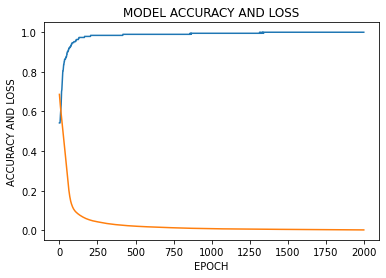

In [16]:
#visualizing the model in loss and accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['loss'])
plt.title('MODEL ACCURACY AND LOSS')
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY AND LOSS')
plt.show()

In [17]:
print(f'training data shape :{x_train.shape}')
print(f'training data shape :{x_test.shape}')

training data shape :(190, 8)
training data shape :(48, 8)


In [18]:
pred = model.predict(x_test)
pred = [1 if y>0.5 else 0 for y in pred]
pred

[0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1]

In [19]:
y_test = [i for i in y_test]
print(f'ACTUAL VALUES: {y_test}')
print(f'PREDICTED VALUE: {pred}')

ACTUAL VALUES: [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1]
PREDICTED VALUE: [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1]
